# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Load dataset**

In [2]:
file_name = 'processed.cleveland.data'

In [3]:
# Define column names
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(file_name, header=None, names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# **DATA EXPLORATION**

In [4]:
# Replace target values: merge classes 2, 3, and 4 into 1
df['target'] = df['target'].replace([2, 3, 4], 1)

In [5]:
# Convert 'sex' column to numeric
df['sex'] = pd.to_numeric(df['sex'], errors='coerce').astype('float')

In [6]:
# Convert 'ca' and 'thal' to numeric, replace invalid values with NaN
df['ca'] = pd.to_numeric(df['ca'], errors='coerce').astype('float')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce').astype('float')

In [7]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

In [8]:
# Detect rows containing non-numeric characters
rows_with_non_numeric = df[
    df[non_numeric_columns].apply(
        lambda x: x.str.contains(r'[^0-9.]').any(),
        axis=1
    )
]

In [9]:
# Check data types
df.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [11]:
# Drop rows with missing values in 'ca' and 'thal' columns
df = df.dropna(subset=['ca', 'thal'])

In [12]:
# Count unique values per column
unique_values = df.nunique()
print("\nUnique Values:\n", unique_values)

# Print unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


Unique Values:
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64
Unique values in 'age':
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

Unique values in 'sex':
[1. 0.]

Unique values in 'cp':
[1. 4. 3. 2.]

Unique values in 'trestbps':
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

Unique values in 'chol':
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276.

In [13]:
# Generate descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [14]:
# Recheck missing values after cleaning
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# **Visualization**

**Distribution of Heart Disease by Sex**

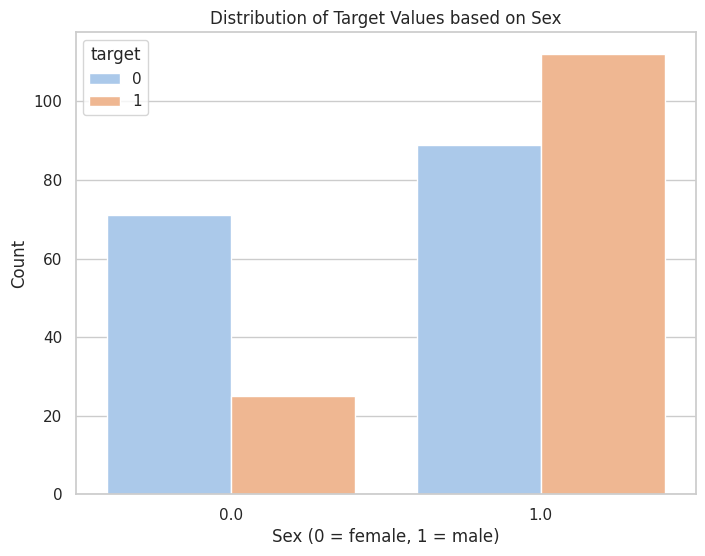

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df, palette='pastel')
plt.title('Distribution of Target Values based on Sex')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.show()

**Age Distribution by Heart Disease Status**

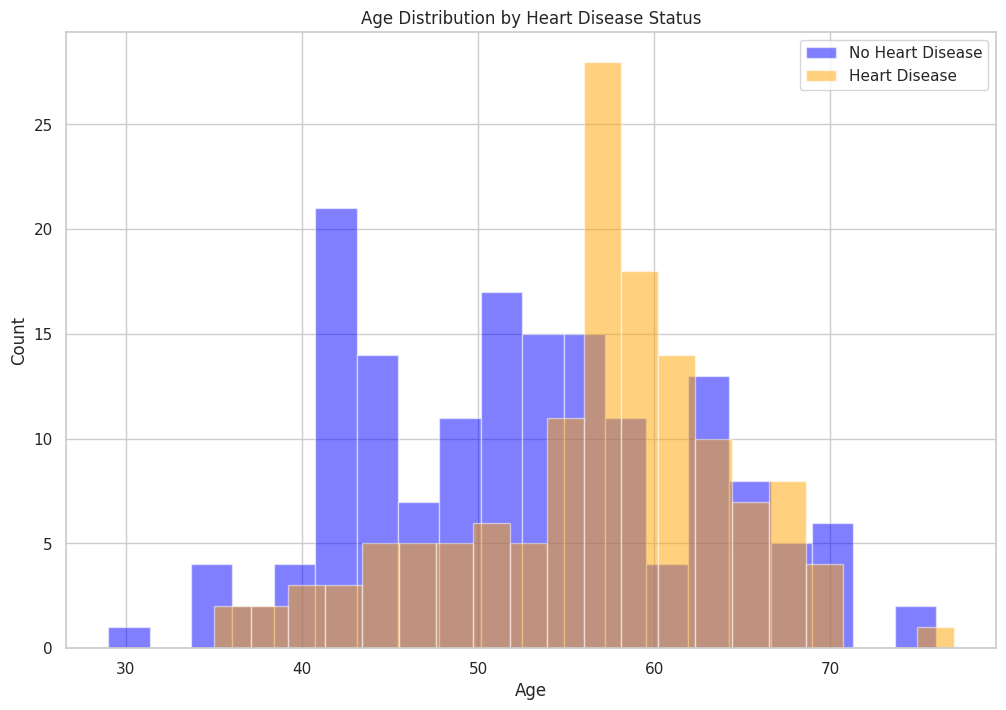

In [16]:
plt.figure(figsize=(12, 8))

plt.hist(df[df['target'] == 0]['age'], bins=20, alpha=0.5,
         label='No Heart Disease', color='blue')

plt.hist(df[df['target'] == 1]['age'], bins=20, alpha=0.5,
         label='Heart Disease', color='orange')

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

**Handle Missing Values**

In [17]:
# Fill missing values with mean
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

**Feature & Target Split + Scaling**

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# Confusion matrices
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

# Accuracy
print("Decision Tree - Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Decision Tree - Testing Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.7166666666666667


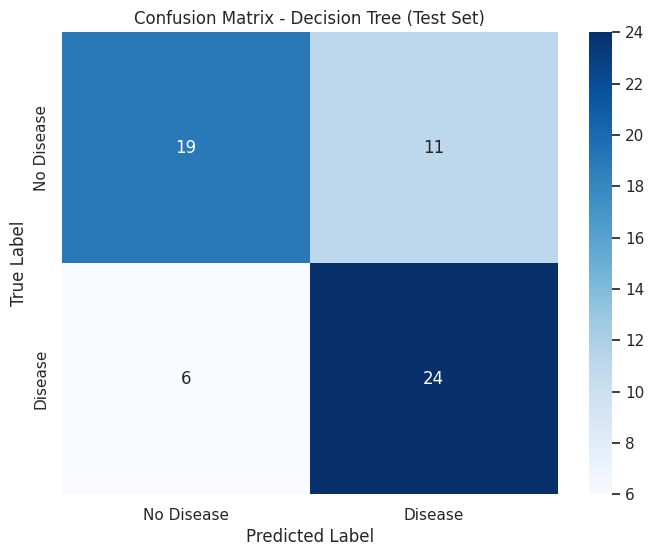

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Decision Tree (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

print("Logistic Regression - Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Logistic Regression - Testing Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression - Training Accuracy: 0.8523206751054853
Logistic Regression - Testing Accuracy: 0.8333333333333334


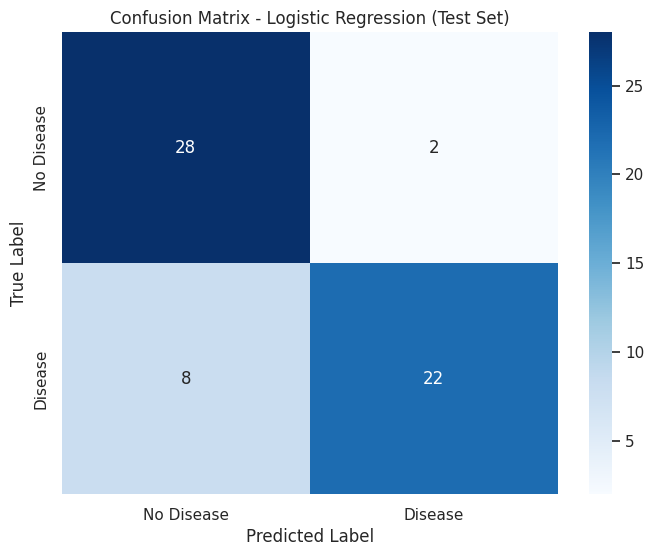

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

print("Naive Bayes - Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Naive Bayes - Testing Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes - Training Accuracy: 0.8565400843881856
Naive Bayes - Testing Accuracy: 0.85


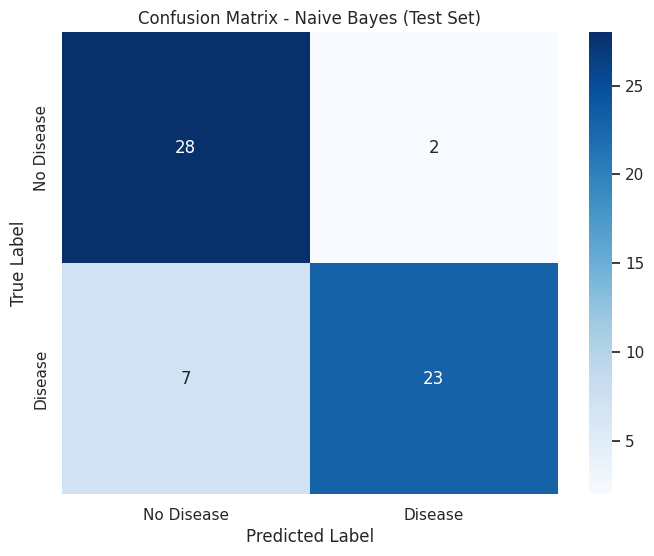

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Naive Bayes (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()